In [1]:
import os
from os import listdir
import numpy as np
import synphot as S
from synphot import SourceSpectrum
from synphot import SpectralElement,Observation,units
from synphot.models import Empirical1D
import astropy.units as u
from synphot import Observation,units

In [2]:
path_StandardStars = "/Users/robberto/Box/@Massimo/_Functional/2021.CAP29/StandardStars/"

## P330E

In [3]:
P330e_file = path_StandardStars + "p330e_mod_004.fits"

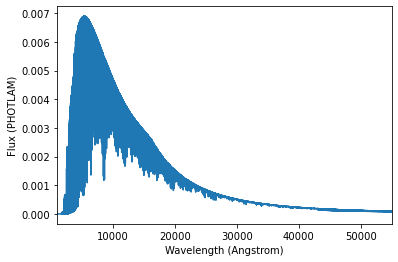

In [4]:
sp = SourceSpectrum.from_file(P330e_file)
sp.plot(left=1000, right=55000)

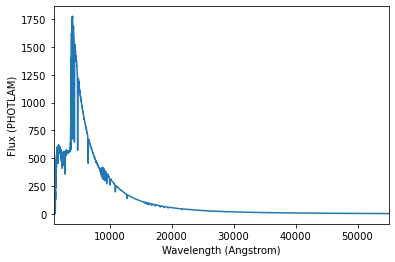

In [5]:
vega = SourceSpectrum.from_vega()
vega.plot(left=1000, right=55000)

# General loop

In [6]:
from os import listdir

filters_directory = "/Users/robberto/Box/@Massimo/_Functional/2021.CAP29/nircam_throughputs/modB/nrc_plus_ote"
files_dir =  listdir(filters_directory)
filter_file = []
filters = []
for names in files_dir:
    if names.endswith("sorted.txt"):
        filter_file.append(names)
        filters.append(names[0:5])        
#print(filter_file,filters)

In [7]:
for i in range(len(filters)):
    bp = SpectralElement.from_file(filters_directory+'/'+filter_file[i])
    bp.waveset.to(u.micron)
    #convoluted way to change the wl units from micron to A. There must be an easier way!
    wl = bp.waveset * 1E4
    th = bp.model.lookup_table
    Filter = SpectralElement(Empirical1D, points=wl, lookup_table=th, keep_neg=True)

#    Filter.plot(left=1000, right=55000)

    area = 25*1E4 * units.AREA
    binset = range(5000, 55001)

    obs_P330e_Filter = Observation(sp, Filter, binset=binset)
    binflux = obs_P330e_Filter.sample_binned(flux_unit='count', area=area)
    # Sample the "native" flux for comparison
    flux = obs_P330e_Filter(binset, flux_unit='count', area=area)
    flux_sum = flux.sum()
#    print(flux_sum)

    obs_vega_Filter = Observation(vega, Filter, binset=binset)
    binflux = obs_vega_Filter.sample_binned(flux_unit='count', area=area)
    # Sample the "native" flux for comparison
    flux_Vega = obs_vega_Filter(binset, flux_unit='count', area=area)
    flux_Vega_sum = flux_Vega.sum()

    mag_P330e_Filter = -2.5 * np.log10(flux_sum/flux_Vega_sum)
    print(filters[i],np.round(flux_sum,2),' VegaMag = ',np.round(mag_P330e_Filter,4))
    
#Other parameters
    print("pivot wl:",np.round(obs_P330e_Filter.pivot(),2),"   effective wl:",np.round(obs_P330e_Filter.effective_wavelength(),2))

F070W 503824.06 ct  VegaMag =  12.4548
pivot wl: 7019.14 Angstrom    effective wl: 7035.79 Angstrom
F090W 808444.79 ct  VegaMag =  12.1583
pivot wl: 8974.52 Angstrom    effective wl: 8995.51 Angstrom
F115W 867311.68 ct  VegaMag =  11.902
pivot wl: 11482.15 Angstrom    effective wl: 11509.83 Angstrom
F140M 477235.72 ct  VegaMag =  11.6165
pivot wl: 14028.62 Angstrom    effective wl: 14035.78 Angstrom
F150W 3260433.95 ct  VegaMag =  11.6389
pivot wl: 15035.82 Angstrom    effective wl: 15447.78 Angstrom
F150W 1020601.2 ct  VegaMag =  11.5445
pivot wl: 14917.33 Angstrom    effective wl: 14949.6 Angstrom
F162M 462122.25 ct  VegaMag =  11.4524
pivot wl: 16239.09 Angstrom    effective wl: 16247.11 Angstrom
F164N 52750.79 ct  VegaMag =  11.4219
pivot wl: 16443.55 Angstrom    effective wl: 16443.82 Angstrom
F182M 529128.47 ct  VegaMag =  11.4314
pivot wl: 18376.44 Angstrom    effective wl: 18390.66 Angstrom
F187N 46604.14 ct  VegaMag =  11.4148
pivot wl: 18738.57 Angstrom    effective wl: 18738

# 177D

In [ ]:
P177d_file = path_StandardStars + "p177d_mod_003.fits"

sp = SourceSpectrum.from_file(P177d_file)
sp.plot(left=1000, right=55000)

for i in range(len(filters)):
    bp = SpectralElement.from_file(filters_directory+'/'+filter_file[i])
    bp.waveset.to(u.micron)
    #convoluted way to change the wl units from micron to A. There must be an easier way!
    wl = bp.waveset * 1E4
    th = bp.model.lookup_table
    Filter = SpectralElement(Empirical1D, points=wl, lookup_table=th, keep_neg=True)

    obs_P330e_Filter = Observation(sp, Filter, binset=binset)
    binflux = obs_P330e_Filter.sample_binned(flux_unit='count', area=area)
    # Sample the "native" flux for comparison
    flux = obs_P330e_Filter(binset, flux_unit='count', area=area)
    flux_sum = flux.sum()

    obs_vega_Filter = Observation(vega, Filter, binset=binset)
    binflux = obs_vega_Filter.sample_binned(flux_unit='count', area=area)
    # Sample the "native" flux for comparison
    flux_Vega = obs_vega_Filter(binset, flux_unit='count', area=area)
    flux_Vega_sum = flux_Vega.sum()

    mag_P330e_Filter = -2.5 * np.log10(flux_sum/flux_Vega_sum)
    print(filters[i],np.round(flux_sum,2),' VegaMag = ',np.round(mag_P330e_Filter,4))
    
#Other parameters
    print("pivot wl:",np.round(obs_P330e_Filter.pivot(),2),"   effective wl:",np.round(obs_P330e_Filter.effective_wavelength(),2))

F070W 327356.08 ct  VegaMag =  12.9229
pivot wl: 7019.51 Angstrom    effective wl: 7036.17 Angstrom
F090W 527858.99 ct  VegaMag =  12.6212
pivot wl: 8976.25 Angstrom    effective wl: 8997.25 Angstrom
F115W 569902.62 ct  VegaMag =  12.358
pivot wl: 11482.39 Angstrom    effective wl: 11510.07 Angstrom
F140M 312668.43 ct  VegaMag =  12.0756
pivot wl: 14028.16 Angstrom    effective wl: 14035.32 Angstrom
F150W 2136600.44 ct  VegaMag =  12.0978
pivot wl: 15031.33 Angstrom    effective wl: 15443.6 Angstrom
F150W 667250.92 ct  VegaMag =  12.006
pivot wl: 14914.81 Angstrom    effective wl: 14947.07 Angstrom
F162M 300717.1 ct  VegaMag =  11.9189
pivot wl: 16239.53 Angstrom    effective wl: 16247.56 Angstrom
F164N 34237.45 ct  VegaMag =  11.8912
pivot wl: 16443.86 Angstrom    effective wl: 16444.13 Angstrom
F182M 345877.61 ct  VegaMag =  11.893
pivot wl: 18377.59 Angstrom    effective wl: 18391.81 Angstrom
F187N 30498.87 ct  VegaMag =  11.8751
pivot wl: 18738.45 Angstrom    effective wl: 18738.83